<a href="https://colab.research.google.com/github/anggithaycs/agglomerative-clustering/blob/master/AHC_1301174317.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

data = pd.read_csv('datakmeans.csv', delimiter=';')

a = data.iloc[:, 0] 
b = data.iloc[:, 1]

c = {'x':a, 'y':b}

df = pd.DataFrame(c)

Text(0, 0.5, 'Distance')

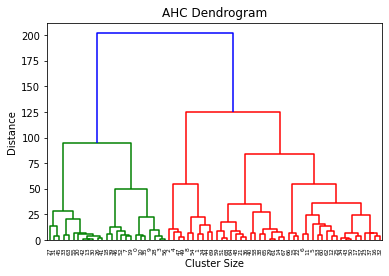

In [3]:
#create dendrogram 
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title("AHC Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

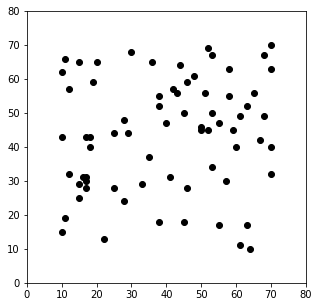

In [4]:
#scatter plot of the data 
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = 'k')
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [0]:
#Perform AHC
k=3 #number of cluster
hc = AgglomerativeClustering(n_clusters=k, affinity = 'euclidean', linkage='ward')

cluster = hc.fit_predict(df)

#assigning the generated cluster to new column called cluster
df["cluster"] = cluster 

In [6]:
df.head() #checking the first 5 rows

,x,y,cluster
0,28,48,0
1,41,31,2
2,55,17,2
3,17,43,0
4,63,17,2


In [0]:
#generating new column called color to assign the color for each cluster
df.loc[df['cluster'] == 0, 'color'] = 'r'
df.loc[df['cluster'] == 1, 'color'] = 'g'
df.loc[df['cluster'] == 2, 'color'] = 'b'

#to save the full columns into the csv file, you can use this:
#df.to_csv("datakmeans.csv")

In [8]:
df.head() #checking the first 5 rows

,x,y,cluster,color
0,28,48,0,r
1,41,31,2,b
2,55,17,2,b
3,17,43,0,r
4,63,17,2,b


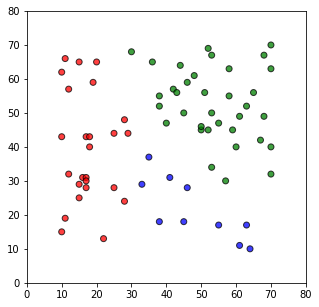

In [9]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.75, edgecolor = 'k')
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()